In [84]:
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
rcParams = {'font.size': 20, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)


filepath = '/Users/harihara/Research-Activities/Data/Hot-Spring/Missing_Contig_Coords/OSA/'
files = listdir(filepath)
files.sort()


118
79
76
97
113
23
20
35
91
50
3
112
81
57
32
19
55
213
62
68
49
84
25
140
153
14
94
23
80
79
105
71
7
22


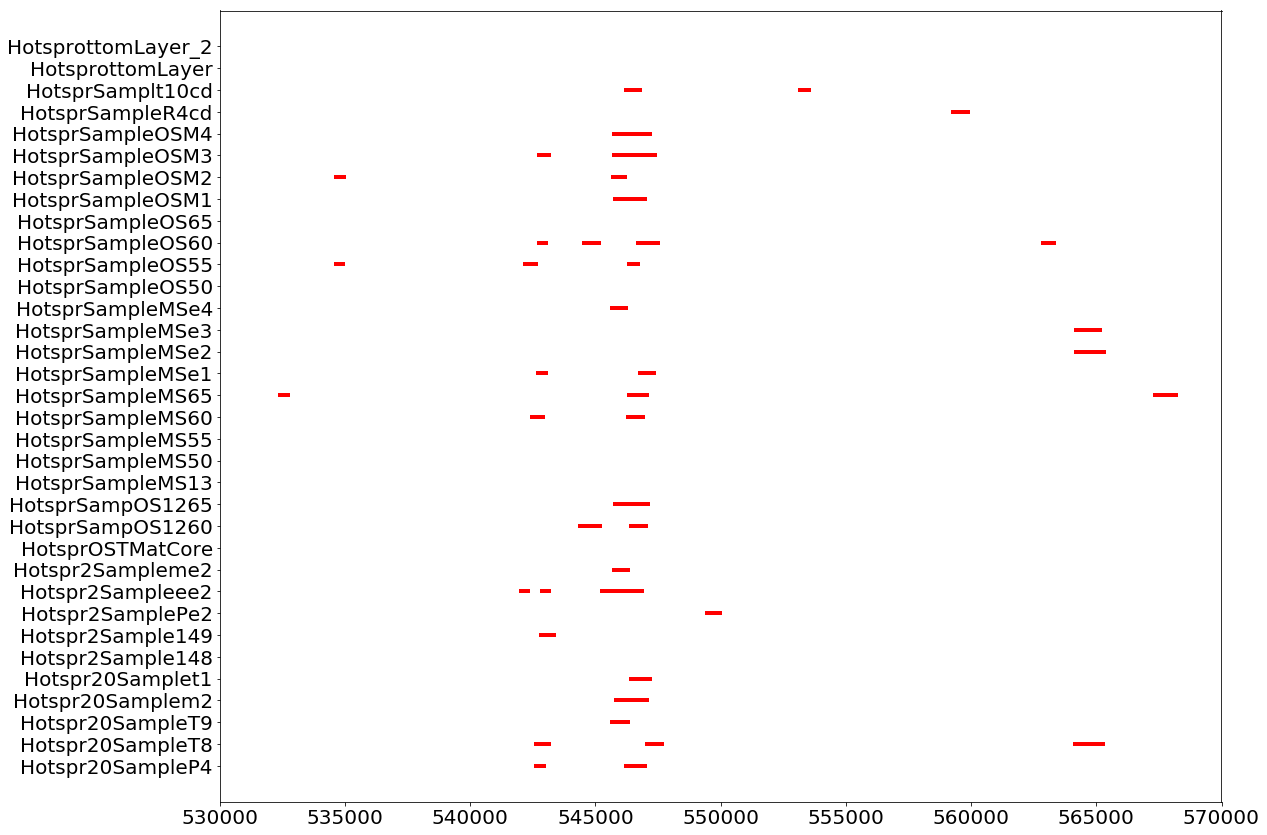

In [116]:
fig, ax = plt.subplots(1,1,figsize=(18,12))
ctr = 0
labels = []
for f in files:
    df = pd.read_csv(filepath+f, sep = "\t")
    del df['Unnamed: 0']
    df = df.loc[df.groupby(['Contig'])['OSA_PIdent(Parent)'].idxmax()]
    df = df[(df['OSA_PIdent(Contig)'] < 30) & (df['OSB_PIdent(Contig)'] < 30)]
    print(len(df))
    starts = df['Start'].tolist()
    ends = df['End'].tolist()
    labels.append(f.replace(".txt",""))
    for i in range(0, len(starts)):
        ax.plot([starts[i], ends[i]], [ctr, ctr], color = 'red', linewidth = 4)
    ctr += 1
ax.set_yticks(list(range(len(labels))))
ax.set_yticklabels(labels)
ax.set_xlim(530000, 570000)
fig.tight_layout()
fig.savefig('OSA-novel-insertions(zoomed-in).png')


224
156
145
80
69
76
63
106
193
147
6
45
33
145
127
83
73
57
150
199
117
205
91
55
58
75
40
18
119
147
295
161
33
67


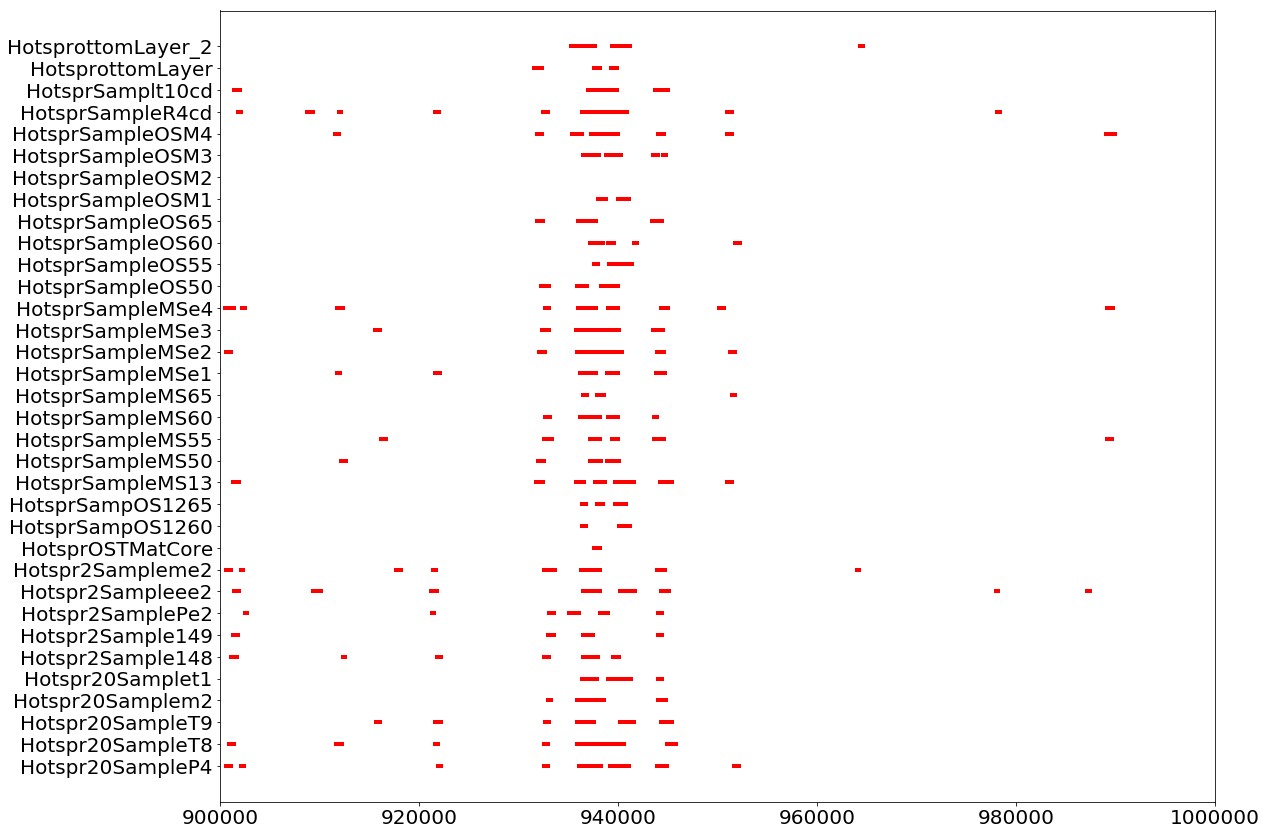

In [112]:
fig, ax = plt.subplots(1,1,figsize=(18,12))
ctr = 0
labels = []
for f in files:
    df = pd.read_csv(filepath.replace("OSA","OSB")+f, sep = "\t")
    del df['Unnamed: 0']
    df = df.loc[df.groupby(['Contig'])['OSB_PIdent(Parent)'].idxmax()]
    df = df[(df['OSA_PIdent(Contig)'] < 30) & (df['OSB_PIdent(Contig)'] < 30)]
    print(len(df))
    starts = df['Start'].tolist()
    ends = df['End'].tolist()
    labels.append(f.replace(".txt",""))
    for i in range(0, len(starts)):
        ax.plot([starts[i], ends[i]], [ctr, ctr], color = 'red', linewidth = 4)
    ctr += 1
ax.set_xlim(900000, 1000000)
ax.set_yticks(list(range(len(labels))))
ax.set_yticklabels(labels)
fig.tight_layout()

fig.savefig('OSB-novel-insertions(zoomed-in).png')

In [85]:
df = pd.read_csv('/Users/harihara/Downloads/HotsprSampleMSe4_osa_k141_27522_containment.txt', sep = "\t")

In [86]:
contigs = df[df['ref_comparison']=='osa']['qseqid'].tolist() + df[df['ref_comparison']=='osa']['sseqid'].tolist()
contigs = list(set(contigs))
dict_contigs = {}

for c in contigs:
    s = c.split('_')
    contig_id = s[-2]+'_'+s[-1]
    if len(s) == 4: sample = s[0]
    if len(s) > 4: sample = '_'.join(s[0:-3])
    
    try:
        dict_contigs[sample].append(contig_id)
    except KeyError:
        dict_contigs[sample] = [contig_id]

Hotspr20SampleP4.txt
Hotspr20Samplet1.txt
HotsprOSTMatCore.txt
HotsprSampOS1260.txt
HotsprSampOS1265.txt
HotsprSampleMS65.txt
HotsprSampleOS55.txt
HotsprSampleOS60.txt
HotsprSampleOS65.txt
HotsprSampleOSM1.txt
HotsprSampleOSM2.txt
HotsprSampleOSM4.txt
HotsprottomLayer.txt
HotsprottomLayer_2.txt


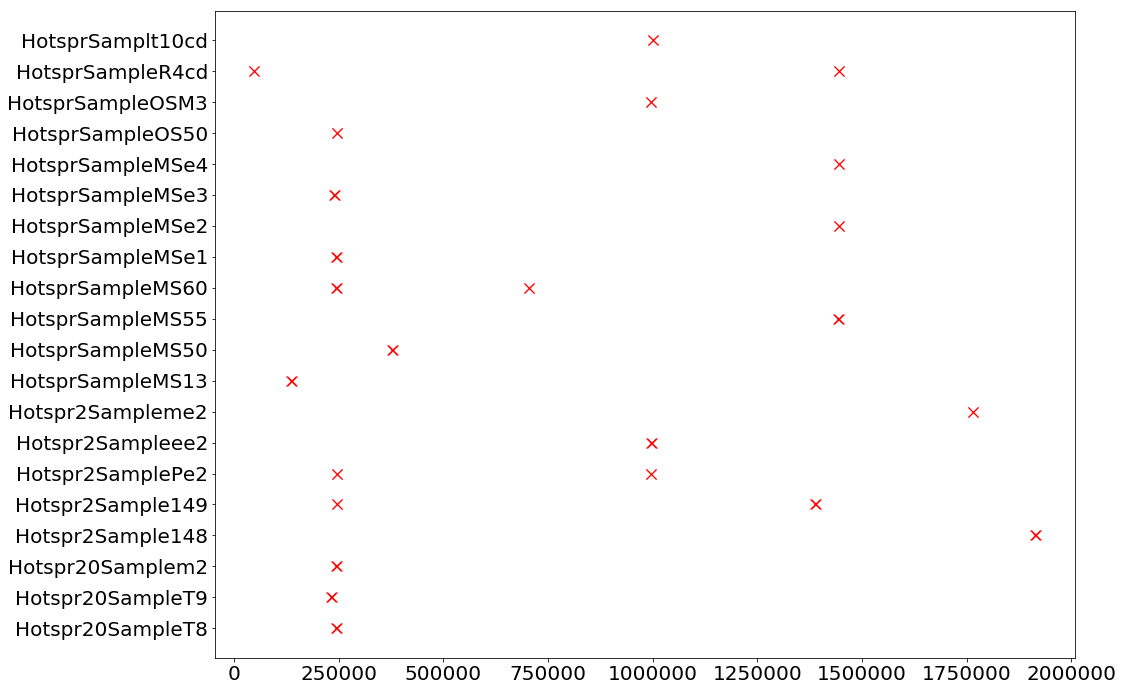

In [102]:
fig, ax = plt.subplots(1,1,figsize = (16,10))
ctr = 0
labels = []
for f in files:
    try: 
        sample = f.replace(".txt","")
        contigs = dict_contigs[sample]
        #print(f, contigs)
    
        df = pd.read_csv(filepath+f, sep = "\t")
        del df['Unnamed: 0']
        df = df.loc[df.groupby(['Contig'])['OSA_PIdent(Parent)'].idxmax()]
        df = df.set_index('Contig')
        df = df.loc[contigs]
        labels.append(sample)
            
        if len(df) == 1:
            ax.plot([df.iloc[0]['Start'], df.iloc[0]['End']], [ctr, ctr], color = 'red', marker = 'x', ms = 10)
        else:
            starts = df['Start'].tolist()
            ends = df['End'].tolist()
            
            for i in range(len(starts)):
                ax.plot([starts[i], ends[i]], [ctr, ctr], color = 'red', marker = 'x', ms = 10)
            
        ctr += 1
    except KeyError:
        print(f)
        pass

ax.set_yticks(list(range(len(labels))))
ax.set_yticklabels(labels)
fig.tight_layout()

fig.savefig('OSA-Novel-Insertion-Location-Across-samples.png')

#ax.axvline(505925, color = 'black') 
#ax.axvline(506131, color = 'black')

#ax.axvline(1884978, color = 'blue') 
#ax.axvline(1885184, color = 'blue')

#ax.axvline(2231334, color = 'red')  
#ax.axvline(2231540, color = 'red')

#ax.axvline(2310289, color = 'green') 
#ax.axvline(2310495, color = 'green')

#ax.axvline(2767025, color = 'orange') 
#ax.axvline(2767231, color = 'orange')

#ax.axvline(106730, color = 'magenta') 
#ax.axvline(106935, color = 'magenta')

#ax.axvline(146902, color = 'teal') 
#ax.axvline(147107, color = 'teal')

#ax.axvline(393376, color = 'grey') 
#ax.axvline(393581, color = 'grey')

In [104]:
print(len(labels))

20


In [105]:
df = pd.read_csv('/Users/harihara/Downloads/HotsprSampleMSe4_osa_k141_27522_containment.txt', sep = "\t")

In [106]:
contigs = (df[df['ref_comparison']=='osa_osb']['qseqid'].tolist() + 
           df[df['ref_comparison']=='osa_osb']['sseqid'].tolist())
contigs = list(set(contigs))
dict_contigs = {}

for c in contigs:
    if 'osb' in c:
        s = c.split('_')
        contig_id = s[-2]+'_'+s[-1]
        if len(s) == 4: sample = s[0]
        if len(s) > 4: sample = '_'.join(s[0:-3])
    
        try:
            dict_contigs[sample].append(contig_id)
        except KeyError:
            dict_contigs[sample] = [contig_id]

Hotspr20SampleP4.txt ['k141_30052', 'k141_46167', 'k141_64064', 'k141_64065']
Hotspr20SampleT8.txt ['k141_16875']
Hotspr20SampleT9.txt ['k141_3115', 'k141_13062', 'k141_60009', 'k141_36260']
Hotspr20SampleT9.txt
Hotspr20Samplem2.txt ['k141_11224']
Hotspr20Samplem2.txt
Hotspr20Samplet1.txt
Hotspr2Sample148.txt ['k141_36649']
Hotspr2Sample149.txt ['k141_8676', 'k141_31620']
Hotspr2SamplePe2.txt ['k141_34579', 'k141_39066']
Hotspr2Sampleee2.txt ['k141_61510', 'k141_11235', 'k141_51583', 'k141_3272']
Hotspr2Sampleme2.txt ['k141_14540', 'k141_17287', 'k141_7984', 'k141_67614', 'k141_2384', 'k141_67613', 'k141_7983']
HotsprOSTMatCore.txt
HotsprSampOS1260.txt
HotsprSampOS1265.txt
HotsprSampleMS13.txt ['k141_14816', 'k141_14817', 'k141_51260']
HotsprSampleMS50.txt ['k141_24047', 'k141_24519']
HotsprSampleMS55.txt
HotsprSampleMS60.txt ['k141_30564']
HotsprSampleMS65.txt
HotsprSampleMSe1.txt ['k141_5293', 'k141_25282', 'k141_48020']
HotsprSampleMSe2.txt ['k141_34639', 'k141_22581', 'k141_34638',

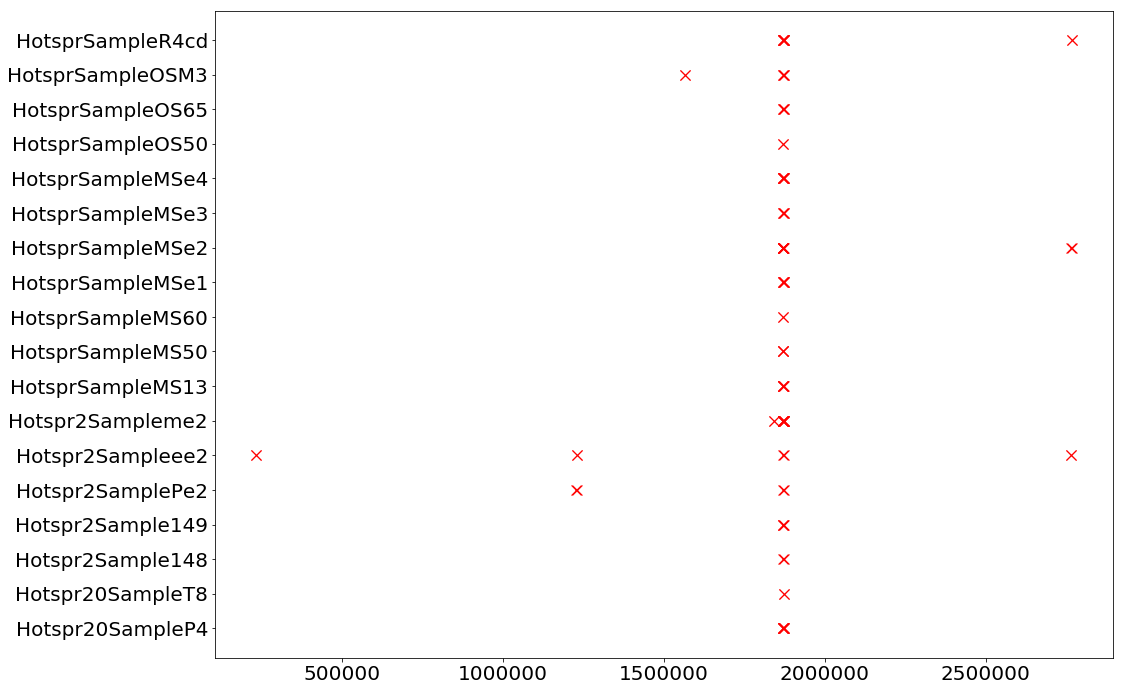

In [108]:
fig, ax = plt.subplots(1,1,figsize = (16,10))
ctr = 0
labels = []
for f in files:
    try: 
        sample = f.replace(".txt","")
        contigs = dict_contigs[sample]
        print(f, contigs)
    
        df = pd.read_csv(filepath.replace("OSA","OSB")+f, sep = "\t")
        del df['Unnamed: 0']
        df = df.loc[df.groupby(['Contig'])['OSB_PIdent(Parent)'].idxmax()]
        df = df.set_index('Contig')
        df = df.loc[contigs]
        labels.append(sample)
        if len(df) == 1:
            ax.plot([df.iloc[0]['Start'], df.iloc[0]['End']], [ctr, ctr], color = 'red', marker = 'x', ms = 10)
        else:
            starts = df['Start'].tolist()
            ends = df['End'].tolist()
            for i in range(len(starts)):
                ax.plot([starts[i], ends[i]], [ctr, ctr], color = 'red', marker = 'x', ms = 10)        
        ctr += 1
    except KeyError:
        print(f)
        pass
ax.set_yticks(list(range(len(labels))))
ax.set_yticklabels(labels)
fig.tight_layout()

fig.savefig('OSB-Novel-Insertion-Location-Across-samples.png')
#ax.set_xlim([1800000, 1900000])